# PCA of images

## Single image

(320, 480, 3)


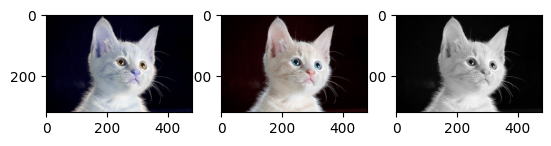

(320, 2)


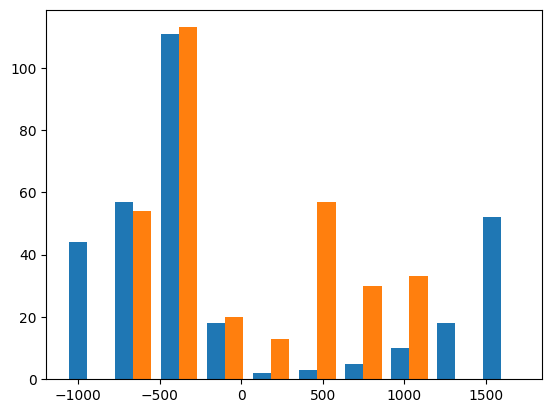

In [41]:
import cv2
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# read image
image = cv2.imread("./cats/0.jpg")

print(image.shape)

# display image
f,axarr = plt.subplots(1, 3)

axarr[0].imshow(image)

# correct the image color then display
axarr[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#conver to gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
axarr[2].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.show()

# extract PCA
pca = PCA(2)

standardized_data = pca.fit_transform(gray)

print(standardized_data.shape)

plt.hist(standardized_data)
plt.show()

## Multiple images

In [44]:
# read images

import os

for file in os.listdir("./cats"):
    if file.endswith(".jpg"):
        print(os.path.join("./cats", file))

./cats\0.jpg
./cats\1.jpg
./cats\2.jpg
./cats\3.jpg


In [45]:
# from PIL import Image
import numpy as np

import cv2

images = []

for file in os.listdir("./cats"):
    if file.endswith(".jpg"):
        images.append(cv2.imread(os.path.join("./cats", file)))

print("Image data size: ", np.array(images).shape)

Image data size:  (4, 320, 480, 3)


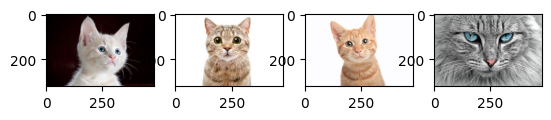

In [46]:
from matplotlib import image
from matplotlib import pyplot as plt

f,axarr = plt.subplots(1, len(images))
rgb_images = []

count = 0

for image in images:
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rgb_images.append(RGB_img)
    axarr[count].imshow(RGB_img)
    count+=1

plt.show()

In [47]:
import cv2

grays = []

for image in rgb_images:
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    grays.append(gray)

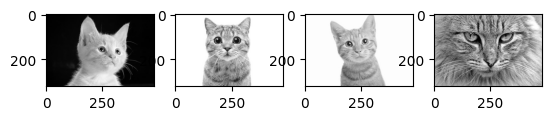

In [48]:
f,axarr = plt.subplots(1, len(images))

count = 0

for gray in grays:
    axarr[count].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    count+=1

plt.show()

In [68]:
while True:
    cv2.imshow("gray", grays[0])
 
    key = cv2.waitKey(1)
    if key == 27:
        break
cv2.destroyAllWindows()

In [69]:
from sklearn.decomposition import PCA

pca = PCA(2)

standardized_data = []

for gray in grays:
    standardized_data.append(pca.fit_transform(gray))

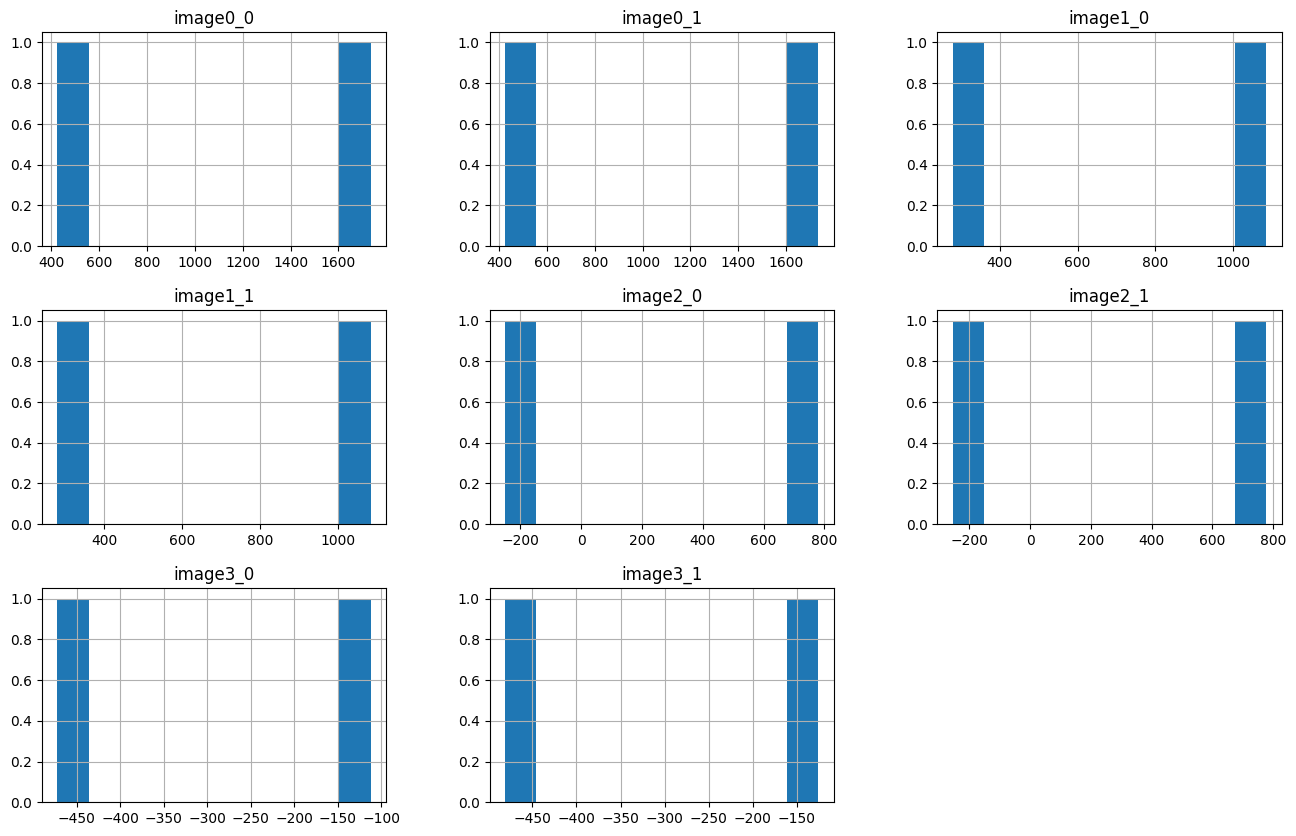

In [70]:
import pandas as pd

       
df = pd.DataFrame({'image0_0':standardized_data[0][0],
                  'image0_1':standardized_data[0][1],
                  'image1_0':standardized_data[1][0],
                  'image1_1':standardized_data[1][1],
                  'image2_0':standardized_data[2][0],
                  'image2_1':standardized_data[2][1],
                  'image3_0':standardized_data[3][0],
                  'image3_1':standardized_data[3][1],})

df.hist(figsize=(16,10))
plt.show()

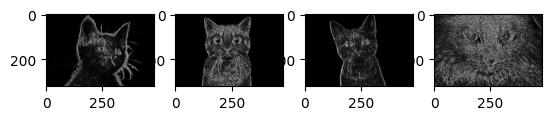

In [76]:
sobel = []

for gray in grays:
    sobel_64 = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
    abs_64 = np.absolute(sobel_64)
    sobel_8u = np.uint8(abs_64)
    sobel.append(sobel_8u)


f,axarr = plt.subplots(1, len(images))

count = 0

for sb in sobel:
    axarr[count].imshow(cv2.cvtColor(sb, cv2.COLOR_BGR2RGB))
    count+=1

plt.show()

(320, 480)


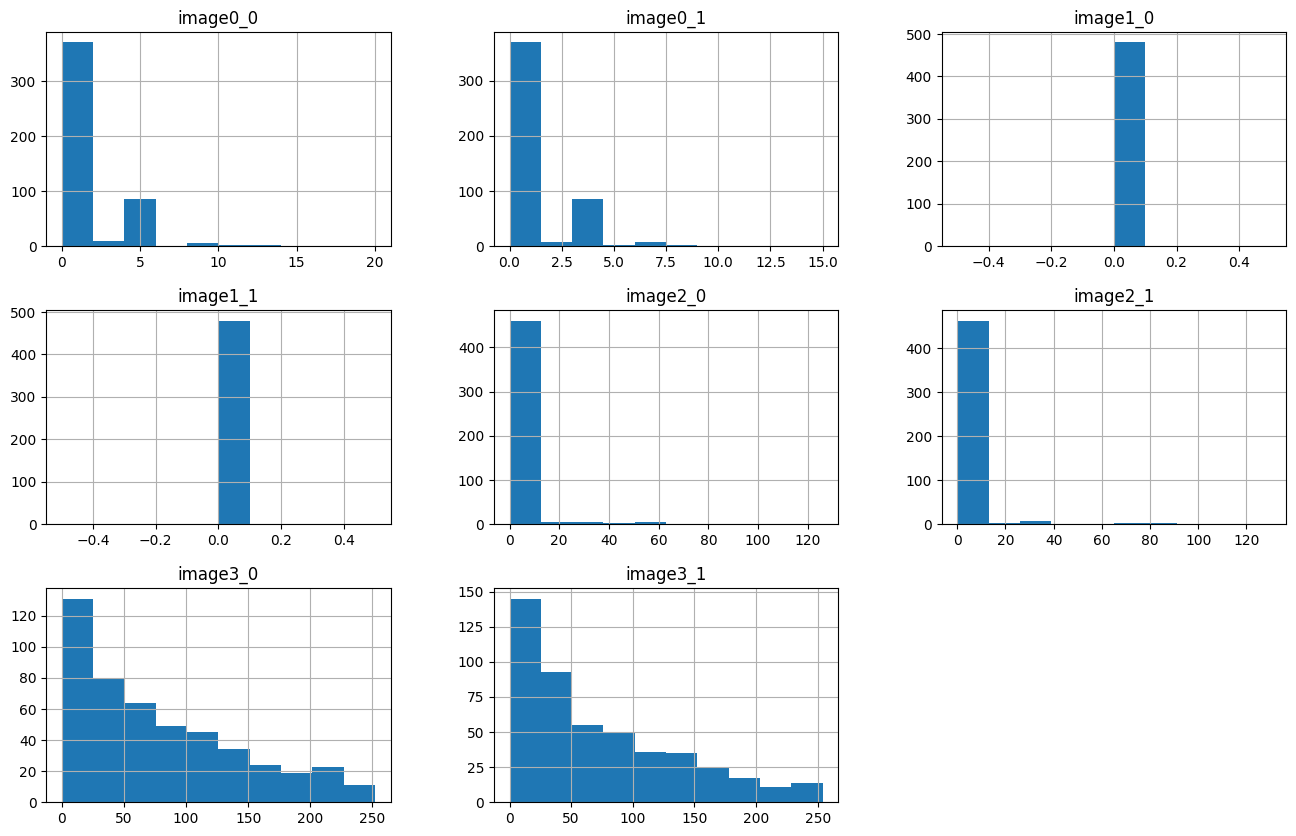

In [80]:
print(sobel[0].shape)

df = pd.DataFrame({'image0_0':sobel[0][0],
                  'image0_1':sobel[0][1],
                  'image1_0':sobel[1][0],
                  'image1_1':sobel[1][1],
                  'image2_0':sobel[2][0],
                  'image2_1':sobel[2][1],
                  'image3_0':sobel[3][0],
                  'image3_1':sobel[3][1],})

df.hist(figsize=(16,10))
plt.show()